In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/given_datasets/wind_power_per_bidzone.parquet")

df = df.reset_index().melt(
    id_vars="index", 
    var_name="bidding_area", 
    value_name="power_MW"
).rename(columns={"index": "time"})
df.head()


,time,bidding_area,power_MW
0,2020-01-01 00:00:00,ELSPOT NO1,149.285262
1,2020-01-01 01:00:00,ELSPOT NO1,152.634024
2,2020-01-01 02:00:00,ELSPOT NO1,151.163256
3,2020-01-01 03:00:00,ELSPOT NO1,150.223341
4,2020-01-01 04:00:00,ELSPOT NO1,157.415142


In [6]:
time_df = pd.to_datetime(df.pop("time"), format='%d.%m.%Y %H:%M:%S')
time_df.head()

0   2020-01-01 00:00:00
1   2020-01-01 01:00:00
2   2020-01-01 02:00:00
3   2020-01-01 03:00:00
4   2020-01-01 04:00:00
Name: time, dtype: datetime64[ns]

In [7]:
time_df_seconds = time_df.map(pd.Timestamp.timestamp)
time_df_seconds.head()

0    1.577837e+09
1    1.577840e+09
2    1.577844e+09
3    1.577848e+09
4    1.577851e+09
Name: time, dtype: float64

In [8]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(time_df_seconds * (2 * np.pi / day))
df['Day cos'] = np.cos(time_df_seconds * (2 * np.pi / day))
df['Year sin'] = np.sin(time_df_seconds * (2 * np.pi / year))
df['Year cos'] = np.cos(time_df_seconds * (2 * np.pi / year))
df['time'] = time_df


df.head()

,bidding_area,power_MW,Day sin,Day cos,Year sin,Year cos,time
0,ELSPOT NO1,149.285262,-7.670342e-12,1.000000,-2.150345e-03,0.999998,2020-01-01 00:00:00
1,ELSPOT NO1,152.634024,2.588190e-01,0.965926,-1.433564e-03,0.999999,2020-01-01 01:00:00
2,ELSPOT NO1,151.163256,5.000000e-01,0.866025,-7.167823e-04,1.000000,2020-01-01 02:00:00
3,ELSPOT NO1,150.223341,7.071068e-01,0.707107,1.964387e-15,1.000000,2020-01-01 03:00:00
4,ELSPOT NO1,157.415142,8.660254e-01,0.500000,7.167823e-04,1.000000,2020-01-01 04:00:00


Text(0.5, 1.0, 'Time of day signal')

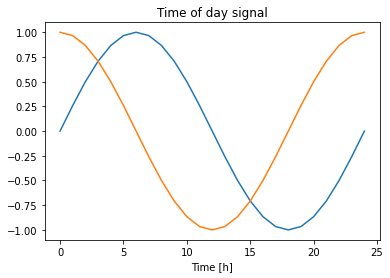

In [9]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [10]:
df_zone = df.groupby(['bidding_area', 'time'], as_index=False).agg({
    'power_MW': 'sum',
    'Day sin': 'first',   
    'Day cos': 'first',
    'Year sin': 'first',
    'Year cos': 'first'
})
df_zone.head()

,bidding_area,time,power_MW,Day sin,Day cos,Year sin,Year cos
0,ELSPOT NO1,2020-01-01 00:00:00,149.285262,-7.670342e-12,1.000000,-2.150345e-03,0.999998
1,ELSPOT NO1,2020-01-01 01:00:00,152.634024,2.588190e-01,0.965926,-1.433564e-03,0.999999
2,ELSPOT NO1,2020-01-01 02:00:00,151.163256,5.000000e-01,0.866025,-7.167823e-04,1.000000
3,ELSPOT NO1,2020-01-01 03:00:00,150.223341,7.071068e-01,0.707107,1.964387e-15,1.000000
4,ELSPOT NO1,2020-01-01 04:00:00,157.415142,8.660254e-01,0.500000,7.167823e-04,1.000000


In [11]:
regions = {region: group.sort_values('time') for region, group in df.groupby('bidding_area')}

In [12]:
df_no1 = regions['ELSPOT NO1']
df_no2 = regions['ELSPOT NO2']
df_no3 = regions['ELSPOT NO3']
df_no4 = regions['ELSPOT NO4']

In [20]:
df_no1["power_MW"].isnull().sum()

12

In [21]:
df_no1[["Day sin", "Day cos", "Year sin", "Year cos"]].isnull().sum()

Day sin     0
Day cos     0
Year sin    0
Year cos    0
dtype: int64

In [11]:
df_no1.shape

(46011, 7)

In [ ]:
df_no2["power_MW"].isnull().sum()

1

In [19]:
df_no2[["Day sin", "Day cos", "Year sin", "Year cos"]].isnull().sum()

Day sin     0
Day cos     0
Year sin    0
Year cos    0
dtype: int64

In [16]:
df_no3["power_MW"].isnull().sum()

0

In [17]:
df_no3[["Day sin", "Day cos", "Year sin", "Year cos"]].isnull().sum()

Day sin     0
Day cos     0
Year sin    0
Year cos    0
dtype: int64

In [17]:
df_no4["power_MW"].isnull().sum()

0

In [18]:
df_no4[["Day sin", "Day cos", "Year sin", "Year cos"]].isnull().sum()

Day sin     0
Day cos     0
Year sin    0
Year cos    0
dtype: int64

In [13]:
df_no2.shape

(46011, 7)

In [ ]:
df_no1.to_parquet("WindAi/created_datasets/arima_power_no1.parquet", index=False)
df_no2.to_parquet("WindAi/created_datasets/arima_power_no2.parquet", index=False)
df_no3.to_parquet("WindAi/created_datasets/arima_power_no3.parquet", index=False)
df_no4.to_parquet("WindAi/created_datasets/arima_power_no4.parquet", index=False)

In [3]:
dataset = pd.read_parquet("/home2/s5549329/windAI_rug/WindAi/arima_sarima_sarimax_pipeline/created_datasets/arima_power_elspot_no1.parquet")
dataset.head(10)

,power_MW,Day sin,Day cos,Year sin,Year cos
0,149.285262,-7.670342e-12,1.000000e+00,-2.150345e-03,0.999998
1,152.634024,2.588190e-01,9.659258e-01,-1.433564e-03,0.999999
2,151.163256,5.000000e-01,8.660254e-01,-7.167823e-04,1.000000
3,150.223341,7.071068e-01,7.071068e-01,1.964387e-15,1.000000
4,157.415142,8.660254e-01,5.000000e-01,7.167823e-04,1.000000
5,151.640429,9.659258e-01,2.588190e-01,1.433564e-03,0.999999
6,144.248918,1.000000e+00,1.023369e-11,2.150345e-03,0.999998
7,131.882442,9.659258e-01,-2.588190e-01,2.867126e-03,0.999996
8,147.393227,8.660254e-01,-5.000000e-01,3.583904e-03,0.999994
9,146.475636,7.071068e-01,-7.071068e-01,4.300681e-03,0.999991
